# Zonebudget Example
Zonebud is a USGS program that computes flow balance information from MODFLOW cell-by-cell flow output files.  One important element is a text file of zone numbers in a zonebud-specific format.  The zone file used in this example was exported from Groundwater Vistas version 8 using Plot|Mass Balance|Export Zonebud zone file.

In [1]:
import os
import flopy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
cwd = os.getcwd()
workingdir = os.path.join(cwd,'model')
print(workingdir)

C:\repos\private\corso-flopy\materials\Session5\model


## Import the zone file and display the zone numbers

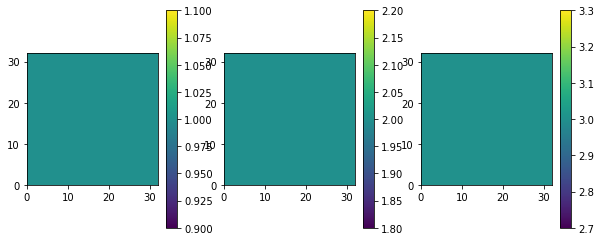

In [3]:
from flopy.utils import ZoneBudget

zone_file = os.path.join(workingdir, "t2_zbud.zone")
zon = ZoneBudget.read_zone_file(zone_file)
nlay, nrow, ncol = zon.shape

fig = plt.figure(figsize=(10, 4))

for lay in range(nlay):
    ax = fig.add_subplot(1, nlay, lay + 1)
    im = ax.pcolormesh(zon[lay, ::-1, :])
    cbar = plt.colorbar(im)
    plt.gca().set_aspect("equal")

plt.show()

## Import the cell-by-cell flows from the MODFLOW run

In [7]:
aliases = {1: "Zone1", 2: "Zone2", 3: "Zone3"}
zb = flopy.utils.ZoneBudget('c:\\esipython\\session5\\model\\t2.cbb', zon, kstpkper=(0, 0),aliases=aliases)
zb.get_budget()

Exception: Cannot load cell budget file: c:\esipython\session5\model\t2.cbb.

In [5]:
# Get a list of the unique budget record names
zb.get_record_names()

NameError: name 'zb' is not defined

## Create a table of mass balance terms for the 3 zones

In [6]:
zb.get_dataframes()

Zone1          Zone2         Zone3
totim name                                                           
0.0   FROM_CONSTANT_HEAD        0.000000       0.000000      0.000000
      FROM_WELLS                0.000000       0.000000      0.000000
      FROM_RECHARGE        126324.000000       0.000000      0.000000
      FROM_Zone1                0.000000  100397.242188      0.000000
      FROM_Zone2            33244.195312       0.000000  82168.070312
      FROM_Zone3                0.000000   16207.720703      0.000000
      TOTAL_IN             159568.187500  116604.960938  82168.070312
      TO_CONSTANT_HEAD      55238.921875       0.000000      0.000000
      TO_WELLS                  0.000000       0.000000  70000.000000
      TO_RECHARGE               0.000000       0.000000      0.000000
      TO_Zone1                  0.000000   33244.195312      0.000000
      TO_Zone2             100397.242188       0.000000  16207.720703
      TO_Zone3                  0.000000   82168.070312      0.000000
      TOTAL_OUT            155636.156250  115412.265625  86207.718750
      IN-OUT                 3932.031250    1192.695312   4039.648438
      PERCENT_DISCREPANCY       2.494909       1.028109      4.798372